In [1]:
# Importing libraries into python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing from sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import preprocessing, neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score

In [3]:
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
plt.style.use('ggplot')
from matplotlib import style
%matplotlib inline

In [4]:
# Importing tensorflow
import tensorflow as tf
from tensorflow import keras

In [5]:
# Importing from keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

In [6]:
import statistics
import math

In [7]:
run = pd.read_csv("sgemm_product.csv",index_col=False)
run["runavg (ms)"] = (run["Run1 (ms)"]+run["Run2 (ms)"]+run["Run3 (ms)"]+run["Run4 (ms)"])/4
run["log_run"] = np.where(run['runavg (ms)']>statistics.median(run["runavg (ms)"]), 1.0, 0.0)
run=run.drop(["runavg (ms)", "Run1 (ms)","Run2 (ms)","Run3 (ms)","Run4 (ms)"],axis=1)
run

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,log_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1.0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,0.0
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,0.0
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,0.0
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,0.0


In [8]:
x= run.iloc[:,:14]
y=run.iloc[:,-1]
y = np.array(y)
x = np.array(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(169120, 14)
(72480, 14)
(169120,)
(72480,)


In [10]:
# Normalizing the data
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [11]:
x.shape

(241600, 14)

In [12]:
# Defining a function for the model for different optimizers
def opt(optimizer):
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(14, activation = 'relu', input_shape = (14,)))
    model.add(Dense(14, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    modfit = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))
    return modfit

In [13]:
def plotopt(modfit, optimizer, count):
    plt.figure(figsize=(14,10))
    plt.subplot(1, 2, 1)
    plt.ylabel('Loss', fontsize=15)
    plt.plot(modfit.history['loss'], 'b', label='Training Loss')
    plt.suptitle("Optimizer "+ optimizer.capitalize(), fontsize=15)
    plt.plot(modfit.history['val_loss'], 'r', label='Validation Loss')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.ylabel('Accuracy', fontsize=15)
    plt.plot(modfit.history['accuracy'], 'b', label='Training Accuracy')
    plt.plot(modfit.history['val_accuracy'], 'r', label='Validation Accuracy')
    plt.legend(loc='upper right')
   
    plt.show()

Train on 169120 samples, validate on 72480 samples
Epoch 1/10
169120/169120 [==============================] - 9s 53us/sample - loss: 0.3419 - accuracy: 0.8606 - val_loss: 0.2456 - val_accuracy: 0.9020
Epoch 2/10
169120/169120 [==============================] - 9s 53us/sample - loss: 0.2274 - accuracy: 0.9060 - val_loss: 0.2175 - val_accuracy: 0.9102
Epoch 3/10
169120/169120 [==============================] - 10s 60us/sample - loss: 0.2142 - accuracy: 0.9096 - val_loss: 0.2091 - val_accuracy: 0.9120
Epoch 4/10
169120/169120 [==============================] - 8s 47us/sample - loss: 0.2093 - accuracy: 0.9110 - val_loss: 0.2041 - val_accuracy: 0.9144
Epoch 5/10
169120/169120 [==============================] - 8s 47us/sample - loss: 0.2059 - accuracy: 0.9121 - val_loss: 0.2080 - val_accuracy: 0.9129
Epoch 6/10
169120/169120 [==============================] - 8s 45us/sample - loss: 0.2030 - accuracy: 0.9131 - val_loss: 0.1991 - val_accuracy: 0.9162
Epoch 7/10
169120/169120 [================

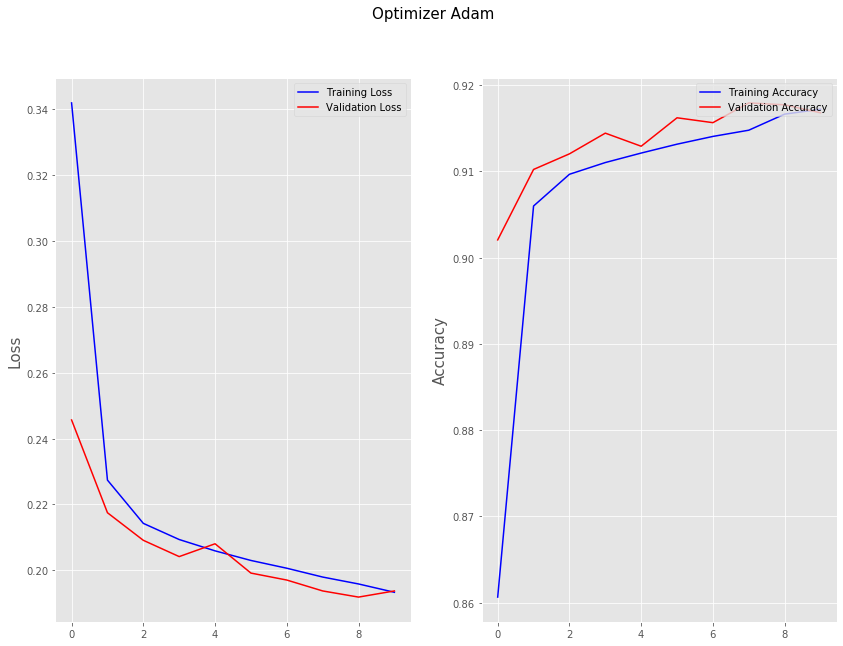

Train on 169120 samples, validate on 72480 samples
Epoch 1/10
169120/169120 [==============================] - 8s 46us/sample - loss: 0.4059 - accuracy: 0.8243 - val_loss: 0.2702 - val_accuracy: 0.8910
Epoch 2/10
169120/169120 [==============================] - 7s 43us/sample - loss: 0.2371 - accuracy: 0.9006 - val_loss: 0.2281 - val_accuracy: 0.9049
Epoch 3/10
169120/169120 [==============================] - 8s 48us/sample - loss: 0.2163 - accuracy: 0.9087 - val_loss: 0.2122 - val_accuracy: 0.9135
Epoch 4/10
169120/169120 [==============================] - 9s 54us/sample - loss: 0.2102 - accuracy: 0.9112 - val_loss: 0.2050 - val_accuracy: 0.9142
Epoch 5/10
169120/169120 [==============================] - 8s 48us/sample - loss: 0.2057 - accuracy: 0.9126 - val_loss: 0.2021 - val_accuracy: 0.9143
Epoch 6/10
169120/169120 [==============================] - 8s 50us/sample - loss: 0.2018 - accuracy: 0.9143 - val_loss: 0.2013 - val_accuracy: 0.9149
Epoch 7/10
169120/169120 [=================

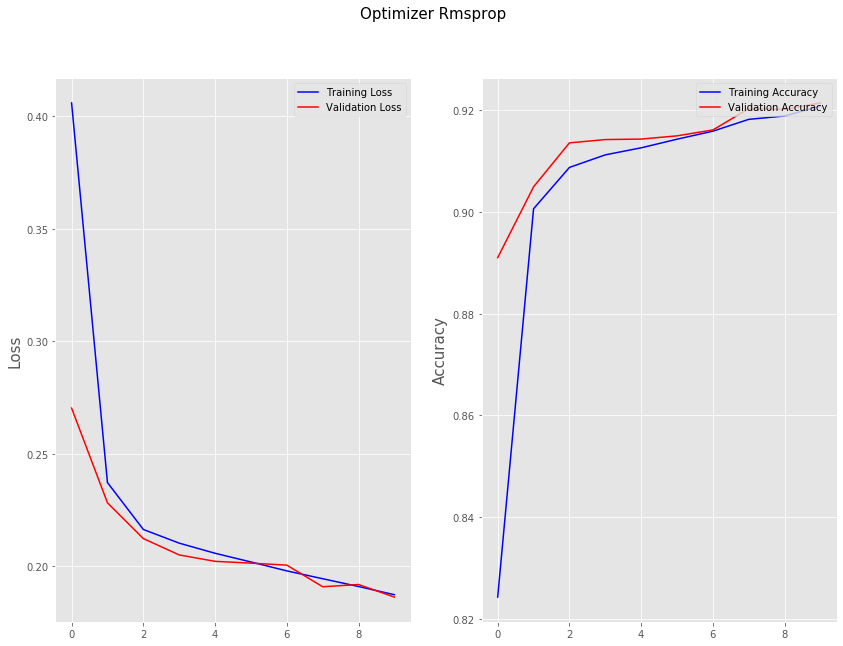

Train on 169120 samples, validate on 72480 samples
Epoch 1/10
169120/169120 [==============================] - 7s 43us/sample - loss: 0.5753 - accuracy: 0.7282 - val_loss: 0.4711 - val_accuracy: 0.7918
Epoch 2/10
169120/169120 [==============================] - 7s 42us/sample - loss: 0.4078 - accuracy: 0.8189 - val_loss: 0.3563 - val_accuracy: 0.8607
Epoch 3/10
169120/169120 [==============================] - 8s 47us/sample - loss: 0.3264 - accuracy: 0.8682 - val_loss: 0.3048 - val_accuracy: 0.8796
Epoch 4/10
169120/169120 [==============================] - 7s 41us/sample - loss: 0.2937 - accuracy: 0.8800 - val_loss: 0.2844 - val_accuracy: 0.8832
Epoch 5/10
169120/169120 [==============================] - 7s 42us/sample - loss: 0.2796 - accuracy: 0.8836 - val_loss: 0.2748 - val_accuracy: 0.8846
Epoch 6/10
169120/169120 [==============================] - 7s 42us/sample - loss: 0.2732 - accuracy: 0.8844 - val_loss: 0.2729 - val_accuracy: 0.8851
Epoch 7/10
169120/169120 [=================

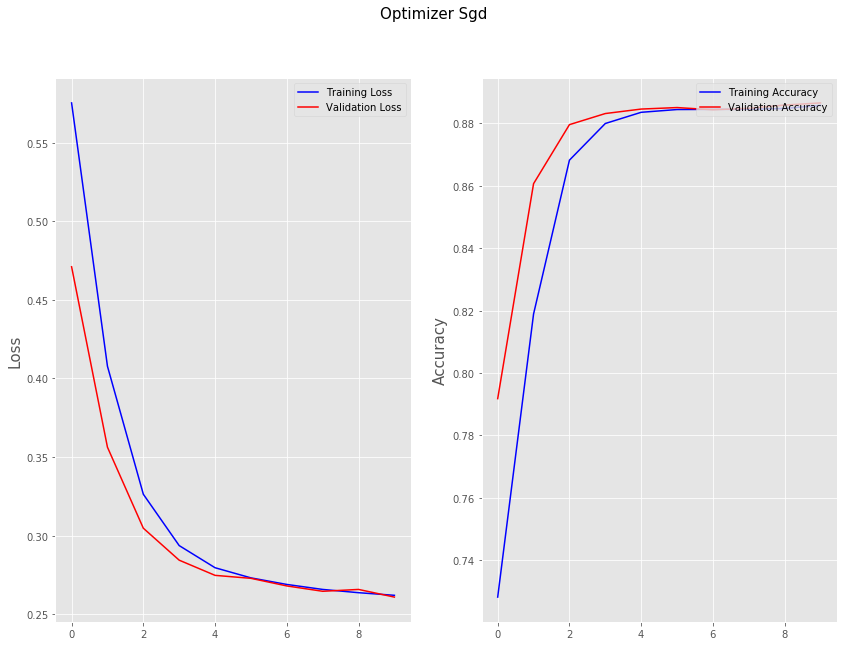

Train on 169120 samples, validate on 72480 samples
Epoch 1/10
169120/169120 [==============================] - 7s 44us/sample - loss: 0.6987 - accuracy: 0.5003 - val_loss: 0.6972 - val_accuracy: 0.4994
Epoch 2/10
169120/169120 [==============================] - 7s 42us/sample - loss: 0.6955 - accuracy: 0.5003 - val_loss: 0.6943 - val_accuracy: 0.4994
Epoch 3/10
169120/169120 [==============================] - 7s 43us/sample - loss: 0.6929 - accuracy: 0.5003 - val_loss: 0.6918 - val_accuracy: 0.4994
Epoch 4/10
169120/169120 [==============================] - 7s 43us/sample - loss: 0.6906 - accuracy: 0.5003 - val_loss: 0.6896 - val_accuracy: 0.4994
Epoch 5/10
169120/169120 [==============================] - 7s 42us/sample - loss: 0.6886 - accuracy: 0.5003 - val_loss: 0.6877 - val_accuracy: 0.4994
Epoch 6/10
169120/169120 [==============================] - 7s 42us/sample - loss: 0.6868 - accuracy: 0.5003 - val_loss: 0.6860 - val_accuracy: 0.4994
Epoch 7/10
169120/169120 [=================

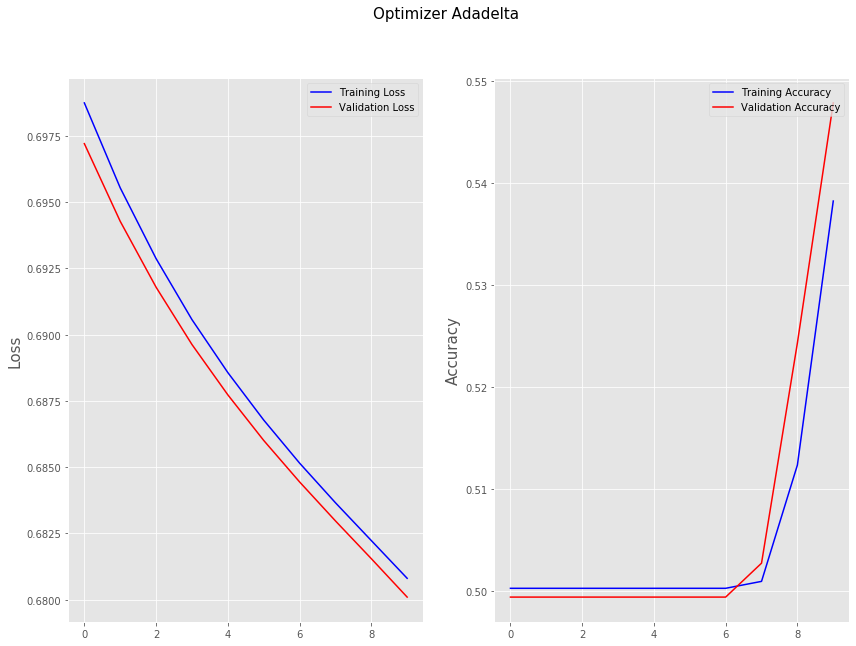

Train on 169120 samples, validate on 72480 samples
Epoch 1/10
169120/169120 [==============================] - 8s 46us/sample - loss: 0.6787 - accuracy: 0.5872 - val_loss: 0.6689 - val_accuracy: 0.6128
Epoch 2/10
169120/169120 [==============================] - 7s 43us/sample - loss: 0.6614 - accuracy: 0.6263 - val_loss: 0.6537 - val_accuracy: 0.6360
Epoch 3/10
169120/169120 [==============================] - 7s 43us/sample - loss: 0.6467 - accuracy: 0.6475 - val_loss: 0.6394 - val_accuracy: 0.6557
Epoch 4/10
169120/169120 [==============================] - 7s 44us/sample - loss: 0.6328 - accuracy: 0.6616 - val_loss: 0.6260 - val_accuracy: 0.6684
Epoch 5/10
169120/169120 [==============================] - 7s 43us/sample - loss: 0.6197 - accuracy: 0.6756 - val_loss: 0.6134 - val_accuracy: 0.6862
Epoch 6/10
169120/169120 [==============================] - 8s 46us/sample - loss: 0.6075 - accuracy: 0.6939 - val_loss: 0.6016 - val_accuracy: 0.7043
Epoch 7/10
169120/169120 [=================

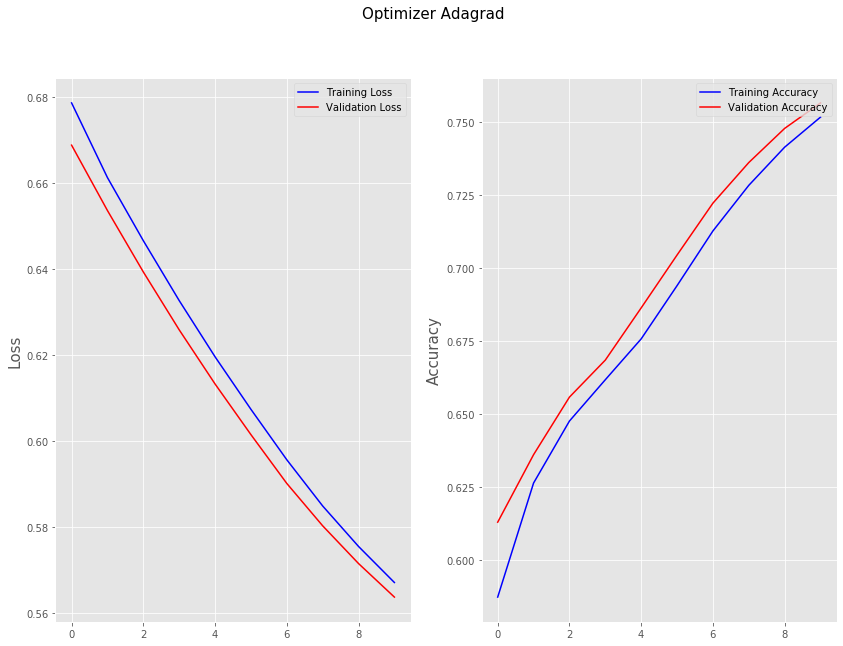

In [14]:
optimizer = ['adam','RMSProp','SGD','AdaDelta','AdaGrad']
for index, i in enumerate(optimizer):
    modfit = opt(i)
    plotopt(modfit, i, index)

In [15]:
#adam
model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(14, activation = 'relu', input_shape = (14,)))
model1.add(Dense(14, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model1_fit = model1.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Train on 169120 samples, validate on 72480 samples
Epoch 1/10
169120/169120 [==============================] - 8s 49us/sample - loss: 0.3593 - accuracy: 0.8409 - val_loss: 0.2543 - val_accuracy: 0.8947
Epoch 2/10
169120/169120 [==============================] - 8s 46us/sample - loss: 0.2345 - accuracy: 0.9005 - val_loss: 0.2197 - val_accuracy: 0.9076
Epoch 3/10
169120/169120 [==============================] - 8s 46us/sample - loss: 0.2133 - accuracy: 0.9084 - val_loss: 0.2074 - val_accuracy: 0.9128
Epoch 4/10
169120/169120 [==============================] - 8s 47us/sample - loss: 0.2031 - accuracy: 0.9118 - val_loss: 0.2074 - val_accuracy: 0.9111
Epoch 5/10
169120/169120 [==============================] - 8s 46us/sample - loss: 0.1963 - accuracy: 0.9148 - val_loss: 0.1949 - val_accuracy: 0.9157
Epoch 6/10
169120/169120 [==============================] - 8s 47us/sample - loss: 0.1909 - accuracy: 0.9171 - val_loss: 0.1865 - val_accuracy: 0.9201
Epoch 7/10
169120/169120 [=================

In [16]:
y_predadam = model1.predict(x_test)
y_predadam = y_predadam > 0.5
accuracy_score(y_test, y_predadam)*100

92.34133554083886

In [17]:
# Confusion matrix for the Adam Optimizer
confusion_matrix(y_test, y_predadam)

array([[35110,  1174],
       [ 4377, 31819]], dtype=int64)

In [ ]:
def opt(optimizer):
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(14, activation = 'relu', input_shape = (14,)))
    model.add(Dense(14, activation = 'relu'))
    model.add(Dense(14, activation = 'relu'))
    model.add(Dense(14, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    modfit = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))
    return modfit

In [27]:
#adam(for 6 layers)
modell = Sequential()
modell.add(Flatten())
modell.add(Dense(14, activation = 'relu', input_shape = (14,)))
modell.add(Dense(14, activation = 'relu'))
modell.add(Dense(14, activation = 'relu'))
modell.add(Dense(14, activation = 'relu'))
modell.add(Dense(1, activation = 'sigmoid'))
modell.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
modell_fit = modell.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Train on 169120 samples, validate on 72480 samples
Epoch 1/10
169120/169120 [==============================] - 10s 59us/sample - loss: 0.3054 - accuracy: 0.8682 - val_loss: 0.2271 - val_accuracy: 0.9063
Epoch 2/10
169120/169120 [==============================] - 10s 61us/sample - loss: 0.2181 - accuracy: 0.9059 - val_loss: 0.2033 - val_accuracy: 0.9121
Epoch 3/10
169120/169120 [==============================] - 11s 64us/sample - loss: 0.2022 - accuracy: 0.9119 - val_loss: 0.2039 - val_accuracy: 0.9103
Epoch 4/10
169120/169120 [==============================] - 10s 56us/sample - loss: 0.1915 - accuracy: 0.9171 - val_loss: 0.1863 - val_accuracy: 0.9196
Epoch 5/10
169120/169120 [==============================] - 9s 53us/sample - loss: 0.1850 - accuracy: 0.9201 - val_loss: 0.1774 - val_accuracy: 0.9241
Epoch 6/10
169120/169120 [==============================] - 9s 52us/sample - loss: 0.1801 - accuracy: 0.9223 - val_loss: 0.1791 - val_accuracy: 0.9230
Epoch 7/10
169120/169120 [=============

Train on 169120 samples, validate on 72480 samples
Epoch 1/10
169120/169120 [==============================] - 8s 48us/sample - loss: 0.4195 - accuracy: 0.8281 - val_loss: 0.3208 - val_accuracy: 0.8731
Epoch 2/10
169120/169120 [==============================] - 8s 47us/sample - loss: 0.2925 - accuracy: 0.8801 - val_loss: 0.2719 - val_accuracy: 0.8916
Epoch 3/10
169120/169120 [==============================] - 8s 46us/sample - loss: 0.2527 - accuracy: 0.8972 - val_loss: 0.2417 - val_accuracy: 0.8979
Epoch 4/10
169120/169120 [==============================] - 8s 45us/sample - loss: 0.2327 - accuracy: 0.9033 - val_loss: 0.2261 - val_accuracy: 0.9043
Epoch 5/10
169120/169120 [==============================] - 8s 45us/sample - loss: 0.2222 - accuracy: 0.9057 - val_loss: 0.2200 - val_accuracy: 0.9058
Epoch 6/10
169120/169120 [==============================] - 8s 47us/sample - loss: 0.2156 - accuracy: 0.9079 - val_loss: 0.2117 - val_accuracy: 0.9104
Epoch 7/10
169120/169120 [=================

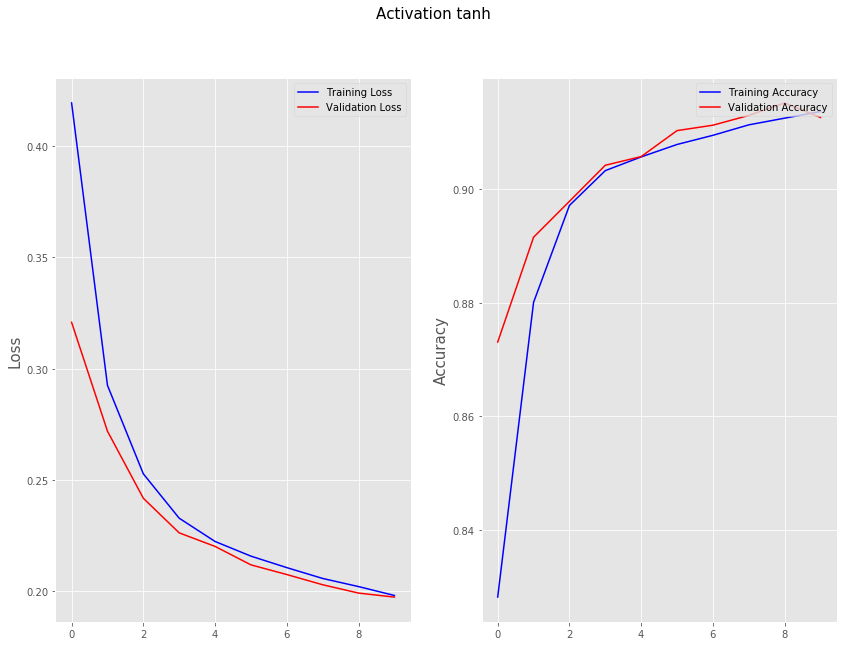

In [18]:
# Building a model with different activation which is 'tanh'
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(14, activation = 'tanh', input_shape = (14,)))
model2.add(Dense(14, activation = 'tanh'))
model2.add(Dense(1, activation = 'sigmoid'))
model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model2_fit = model2.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

plt.figure(figsize = (14,10))
plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=15)
plt.plot(model2_fit.history['loss'], 'b', label='Training Loss')
plt.suptitle("Activation tanh", fontsize=15)
plt.plot(model2_fit.history['val_loss'], 'r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=15)
plt.plot(model2_fit.history['accuracy'], 'b', label='Training Accuracy')
plt.plot(model2_fit.history['val_accuracy'], 'r', label='Validation Accuracy')
plt.legend(loc='upper right')


In [19]:
# Predictions for the adam Optimizer and 'tanh' activation
y_pred_tanh = model2.predict(x_test)
y_pred_tanh = y_pred_tanh > 0.5
accuracy_score(y_test, y_pred_tanh)*100

91.26931567328919

In [20]:
# Confusion matrix for the adam Optimizer having 'tanh' activation
confusion_matrix(y_test, y_pred_tanh)

array([[33988,  2296],
       [ 4032, 32164]], dtype=int64)

In [21]:
##KNN
clf = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Accuracy Score:  94.5309050772627


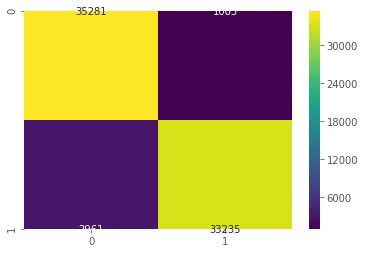

In [22]:
y_pred_knn = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_knn)*100
print("Accuracy Score: ", "{}".format(accuracy))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred_knn)),annot=True,fmt="g", cmap='viridis')

In [23]:
error = []
# Calculating error for K values between 1 and 25
for i in range(1, 25):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

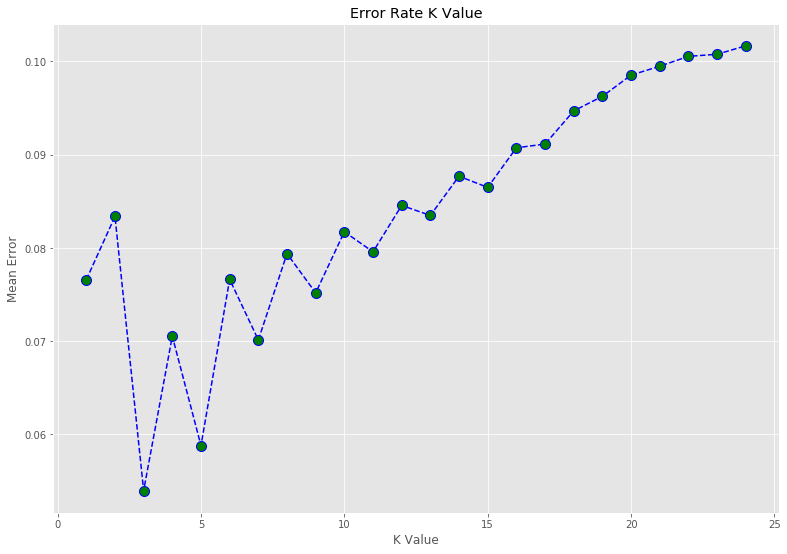

In [24]:
# Plot for the calculated error
plt.figure(figsize=(13, 9))
plt.plot(range(1, 25), error, color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='green', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.savefig('KNNErrorPlot.png')

In [25]:
# KNN Using Different Distance metrics
def knn(x_train, x_test, y_train, y_test, neighbor, distance_metri):
    model = KNeighborsClassifier(n_neighbors=neighbor, metric=distance_metri)
    model.fit(x_train,y_train)
    return accuracy_score(y_test,model.predict(x_test))*100
 
distance_pd = pd.DataFrame(index=[['Euclidean','Manhattan','Hamming','Minkowski']])
error = []
neighbor = []
for i in range(1, 10):  
    knn_euclidean = knn(x_train,x_test,y_train,y_test,i, 'euclidean')
    knn_manhattan = knn(x_train,x_test,y_train,y_test,i, 'manhattan')
    knn_hamming = knn(x_train,x_test,y_train,y_test,i, 'hamming')
    knn_minkowski = knn(x_train,x_test,y_train,y_test,i, 'minkowski')
    distance_pd[i] = np.array([(100-knn_euclidean), (100-knn_manhattan),(100-knn_hamming),(100-knn_minkowski)])

distance_pd = distance_pd.swapaxes(0,1)
distance_pd

,Euclidean,Manhattan,Hamming,Minkowski
1,7.658664,8.173289,16.699779,7.658664
2,8.337472,9.132174,16.223786,8.337472
3,5.397351,5.469095,12.024007,5.397351
4,7.052980,6.697020,12.218543,7.052980
5,5.880243,5.645695,10.894040,5.880243
6,7.662804,7.150938,12.196468,7.662804
7,7.012969,6.654249,12.024007,7.012969
8,7.938742,7.541391,13.275386,7.938742
9,7.517936,7.225442,13.203642,7.517936
